# Project 3

Import some libraries and the datasets

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_halving_search_cv # because it is experimental we need this
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV
from ISLP import load_data, confusion_table
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, log_loss, mean_squared_error,confusion_matrix, classification_report,balanced_accuracy_score, max_error, PredictionErrorDisplay,mean_absolute_error, mean_absolute_percentage_error)
from sklearn.ensemble import (RandomForestRegressor, RandomForestClassifier)
from sklearn.inspection import permutation_importance
from sklearn.tree import export_graphviz
from IPython.display import Image, Markdown
import graphviz
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
import re
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr
from collections import defaultdict

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
# no idea what this is
# main dataset
data_index_2 = pd.read_csv('../Project_datasets/data_index_2.csv', quotechar="'")
data_index_2 = data_index_2.drop(columns=['Unnamed: 0'])
nan_template = ~(data_index_2.isna().any(axis=1))
data_index_2 = data_index_2[nan_template] # delete rows with NaN
# precipitation by day and statistics
if True:
    Predaymean = pd.read_csv('../Project_datasets/Predaymean1961_1990.csv')[nan_template]
    Predaymean_statistics = pd.read_csv('../Project_datasets/Predaymean1961_1990_statics.csv')[nan_template]
    # maximum temperature by day and statistics
    Tmaxdaymean = pd.read_csv('../Project_datasets/Tmaxdaymean1961_1990.csv')[nan_template]
    Tmaxdaymean_statistics = pd.read_csv('../Project_datasets/Tmaxdaymean1961_1990_statics.csv')[nan_template]
    # minimum temperature by day and statistics
    Tmindaymean = pd.read_csv('../Project_datasets/Tmindaymean1961_1990.csv')[nan_template]
    Tmindaymean_statistics = pd.read_csv('../Project_datasets/Tmindaymean1961_1990_statics.csv')[nan_template]
    # mean temperature by day and statistics
    Tmpdaymean = pd.read_csv('../Project_datasets/Tmpdaymean1961_1990.csv')[nan_template]
    Tmpdaymean_statistics = pd.read_csv('../Project_datasets/Tmpdaymean1961_1990_statics.csv')[nan_template]
    # shortwave radiation flux
    Tswrfdaymean = pd.read_csv('../Project_datasets/Tswrfdaymean1961_1990.csv')[nan_template]
    Tswrfdaymean_statistics = pd.read_csv('../Project_datasets/Tswrfdaymean1961_1990_statics.csv')[nan_template]

In [ ]:
gridlist_pan_gfed_ISO3_UN = open('../Project_datasets/gridlist_pan_gfed_ISO3_UN.txt','r')

Show the first entries

### Main Data set

Short legend about the colums: 

Lon: Longitude<br>
Lat: Latidude

stuff about the souil texture: <br>

clay: Clay in %<br>
silt: Silt in % (sedimentary deposit that is formed when a river deposits the material it is carrying)<br>
slay: slay in %(soil in eg. rainforest) <br>
sand: sand in % %<br>
orC: organic carbondioxid in %<br>
CN: Cyanide in %<br>
pH: pH<br>
cell fraction: portion of cells / organic material in soil in % <br>


Allways with season: Same as the tables below.

tmax: maximum temperatur in K <br>
tmin: min temperature in K <br>
tmp:mean temperature in K <br>
Pre: Precipitation, mm day-1 <br>
tswrf: Total shortwave radiation flux, W m-2


This is the GUESS output: 

NPP: net primary productivity (kg C m-2 year-1)<br>
SoilR: soil respiration (kg C m-2 year-1)<br>
MaxBiomeCmass: The maximum biomass from a single biome (kg C m-2)<br>
MxbiomeLAI: The maximum leaf area index from a single biome (unitless)<br>
VegC: Vegetation carbon poo (kg C m-2)l<br>
LitterC: Litter carbon pool (kg C m-2)<br>
SoilC: Soil carbon pool (kg C m-2)<br>
Biome_Cmass: The biome type based on the maximum biomass (category)<br>
Biome_LAI: The biome type based on the maximum LAI (category)<br>
Biome_obs: The observed biome type (category)<br>

Country codes

GFED-region: Global Fire Emissions Database (https://www.un-spider.org/global-fire-emissions-database-gfed) <br>
Pan_2007: Big reogion (Europa, Africa, Australia, USA, Russia, China, .... )<br>
ISO3: Abbreviation for country <br>
UN: Country code

In [ ]:
print(f'shape: {data_index_2.shape}')
data_index_2.head()

In [ ]:
with open("../Project_datasets/Readme.txt",'r') as script:
    speech = script.read().splitlines()

count = 1
for line in speech:
    if False:
        count+=1
        if count % 2 == 0: #this is the remainder operator
            print(line)
    else:
        print(line)

### Pred (Precipitation, mm day-1)
 

In [ ]:
print(f'shape: {Predaymean.shape}')
#Predaymean.head()

In [ ]:
print(f'shape: {Predaymean_statistics.shape}')
#Predaymean_statistics.head()

### Tmp (Daily mean temperature, K)

In [ ]:
print(f'shape: {Tmpdaymean.shape}')
#Tmpdaymean.head()

In [ ]:
print(f'shape: {Tmpdaymean_statistics.shape}')
#Tmpdaymean_statistics.head()

### Tmax

In [ ]:
print(f'shape: {Tmaxdaymean.shape}')
#Tmaxdaymean.head()

In [ ]:
print(f'shape: {Tmaxdaymean_statistics.shape}')
#Tmaxdaymean_statistics.head()

### Tmin

In [ ]:
print(f'shape: {Tmindaymean.shape}')
#Tmindaymean.head()

In [ ]:
print(f'shape: {Tmindaymean_statistics.shape}')
#Tmindaymean_statistics.head()

### Tswrf (Total shortwave radiation flux, W m-2)

In [ ]:
print(f'shape: {Tswrfdaymean.shape}')
#Tswrfdaymean.head()

In [ ]:
print(f'shape: {Tswrfdaymean_statistics.shape}')
#Tswrfdaymean_statistics.head()

### County List and binome legend

In [ ]:
# Read the data from file into a list-of-lists table.
with open('../Project_datasets/gridlist_pan_gfed_ISO3_UN.txt') as file:
    datatable = [line.split() for line in file.read().splitlines()]

country_codes = pd.DataFrame(datatable, columns = ['Lon', 'Lat', 'GFED-region', 'Pan_2007', 'ISO3', 'UN'] )  
country_codes = country_codes.drop(index = 0)
country_codes.head()

In [ ]:
    
with open("../Project_datasets/legend of biomes.txt",'r') as script:
    speech = script.read().splitlines()

count = 1
for line in speech:
    if True:
        count+=1
        if count % 2 == 0: #this is the remainder operator
            print(line)
    else:
        print(line)

## Some preparations

### number of samples of different biomes in different coutries

In [ ]:
countrys_sample_size = data_index_2.groupby(['ISO3', 'Biome_obs']).size()   
#countrys_sample_size = pd.DataFrame(countrys_sample_size)
#countrys_sample_size.columns = [ "Size"]           # Maybe solve later
countrys_sample_size.head()

In [ ]:
# Samply size for countries
countrys_sample_size.at["EGY"]

### Plot and table generation

In [3]:
# Names my have to be improved
def df_to_latex(df, filename = 'mytable', caption=''):  
    s = df.style.to_latex(
    column_format="rrrrr",#  position="h", position_float="centering",
    hrules=True,
    multirow_align="t", multicol_align="r"
    )  
        
    with open('../table/' + filename + '.tex', 'w') as f:
        f.write(s)  
    

In [4]:
def save_plot(figure, figurename = 'my_plot'):
    figure.savefig('../plots/' + figurename + '.pdf', bbox_inches='tight')

## test
#save_plot(fig, figurename ='worldmap')

### Plot function for statistics

In [5]:
def plot_statistics(data, name_data = 'data'):
    
    obs_data = "Biome_obs"
    fig, ax = plt.subplots(figsize = (8,4))
    ax = sns.countplot(data, x = obs_data)
    save_plot(fig, figurename = 'countplot_' + name_data + '_' + obs_data)
    
    obs_data = "Biome_Cmax"
    fig, ax = plt.subplots(figsize = (8,4))
    ax = sns.countplot(data, x = obs_data)
    save_plot(fig, figurename = 'countplot_' + name_data + '_' + obs_data)
    
    ## sample biomes
    obs_data = "Biome_obs_Pan_2007"
    fig, ax = plt.subplots(figsize = (8,4))
    ax = sns.countplot(data, x = 'Pan_2007', hue = 'Biome_obs')
    ax.tick_params(axis='x', rotation=90)
    save_plot(fig, figurename = 'countplot_' + name_data + '_' + obs_data)
    
    ## sample biomes
    obs_data = "Biome_obs_ISO3"
    fig, ax = plt.subplots(figsize = (8,4))
    ax = sns.countplot(data, x = 'ISO3', hue = 'Biome_obs')
    ax.tick_params(axis='x', rotation=90)
    save_plot(fig, figurename = 'countplot_' + name_data + '_' + obs_data)
    
    ## scatterplot biome_Cmax and biome_LAI
    obs_data = "Biome_obs_Biome_Cmax"
    fig, ax = plt.subplots(figsize = (4,4))
    ax = sns.scatterplot(data, x = "Biome_Cmax", y = "Biome_obs")
    ax.set_yticks(range(1, 20,2))
    save_plot(fig, figurename = 'scatterplot_' + name_data + '_' + obs_data)
    
    '''
    obs_data = "Biome_obs_Biome_LAI"
    fig, ax = plt.subplots(figsize = (4,4))
    ax = sns.scatterplot(data, x = "Biome_LAI", y = "Biome_obs")
    ax.set_yticks(range(1, 20,2))
    save_plot(fig, figurename = 'scatterplot_' + name_data + '_' + obs_data)
    '''
    
    # NPP
    obs_data = "NPP"
    fig, axs = plt.subplots( 1,2, constrained_layout=True)
    sns.histplot(data, x=obs_data,  kde=True, ax=axs[0]) #stat="density", kde=True,, log_scale=True
    sns.ecdfplot(data, x="NPP", ax=axs[1])
    save_plot(fig, figurename = 'histogramm_' + name_data + '_' + obs_data)
    
    #"VegC"
    obs_data = "VegC"
    fig, axs = plt.subplots(1,2, constrained_layout=True)
    sns.histplot(data, x=obs_data,   kde=True, ax=axs[0]) #stat="density", kde=True,binwidth=1,
    sns.ecdfplot(data, x="VegC", ax=axs[1])
    save_plot(fig, figurename = 'histogramm_' + name_data + '_' + obs_data)

## Section 2: Visualisation


In [ ]:
weather_params = ['pre','tmp|tmin|tmax','tswrf']

features_weather = [feature_name for feature_name in list(data_index_2) if \
                   re.search('Fall|Summer|Winter|Spring',feature_name)]

liste = ['Lat', 'Lon', 'UN', 'GFED-region', 'Biome_obs', 'Biome_LAI', 'Biome_Cmax']+features_weather

print(data_index_2.head())
print(data_index_2.drop(liste, axis=1).describe())

Countplot to count the number of data for each biom: 

In [ ]:
#sns.scatterplot(data_index_2, x="Lon", y="Lat", hue="Biome_obs")

In [ ]:
plot_statistics(data_index_2)

Biome with index 4?

In [ ]:
data_index_2.loc[data_index_2['Biome_obs'] == 4]

## Functions for Classifiaction and Regression

### Generate test and train sets

In [6]:
# the following function generates X_test, Y_test and X_train, Y_train for the binary classification
def model_create_XY(region_train, region_test, \
                     drop_columns=[], use_columns=None, \
                        objective='Biome_obs', objective_list=None, continuous_Y=False,
                        objective_test=None, drop_LPG_guess=True):
      
      drop_columns = drop_columns.copy() + [objective] # we would not want our objective to appear in the training data
      if not objective_test: objective_test = objective

      # restrict to two biomes, restrict to country codes, remove any rows with NaN
      if not continuous_Y:
            if not objective_list: objective_list=list(data_index_2.loc[region_train][objective].drop_duplicates())
            relevant_data_train = data_index_2.loc[data_index_2[objective].isin(objective_list)] # restrict to given biomes
            # in case we want to use LPJ_guess output, write LPJ_ before the objective_list
            relevant_data_test = data_index_2.loc[data_index_2[objective_test].isin(objective_list)] # restrict to given biomes
      else:
            relevant_data_train = data_index_2
            relevant_data_test = data_index_2

                  
      relevant_data_train = relevant_data_train.loc[region_train] # restrict to training country
      relevant_data_test = relevant_data_test.loc[region_test] # restrict to test country

      drop_columns += ['MaxBiomeLAI','Biome_obs','Biome_LAI','Biome_Cmax',
                       'Lon','Lat','Pan_2007','ISO3','UN','MaxBiomeCmax']
      if drop_LPG_guess: drop_columns += ['CN','pH','cellfraction','NPP','VegC','SoilC','LitterC','SoilR','GFED-region'] # drop these columns
      if use_columns:
            X_train = relevant_data_train[use_columns]
            X_test = relevant_data_test[use_columns]
      else:
            X_train = relevant_data_train.drop(columns=drop_columns)
            X_test = relevant_data_test.drop(columns=drop_columns)

      feature_names = list(X_train.columns)

      Y_train = relevant_data_train[objective]
      Y_test = relevant_data_test[objective_test]

      print(f"length of training data: {Y_train.shape[0]}")
      print(f"length of testing data: {Y_test.shape[0]}")
      

      return X_train, X_test, Y_train, Y_test, feature_names

### Plot Feature importance (Permutation importance vs. purity importance)

Important Notes
- The more accurate model is, the more trustworthy computed importances are.
- The computed importances describe how important features are for the machine learning model. It is an approximation of how important features are in the data.


In [7]:
def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y,  n_repeats=10, random_state=42, n_jobs=2) # n_repeats=10, random_state=42, n_jobs=2
    perm_sorted_idx = result.importances_mean.argsort()
    
    x_val = X.columns[perm_sorted_idx]
    y_val = result.importances[perm_sorted_idx].mean(axis=1).T
    
    ax.barh(x_val[-5:], y_val[-5:])
    ax.tick_params(axis='y', which = 'minor', labelsize=10)
    #ax.axvline(x=0, color="k", linestyle="--")
    return ax

def plot_permutation_importance_big_graph(clf, X_train, X_test,  Y_train, Y_test, experiment_name):

    mdi_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
    # tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
    # tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 4))
    y = mdi_importances.sort_values()
    y[-5:].plot.barh(ax=ax1)
    ax1.set_xlabel("Gini importance")
    plot_permutation_importance(clf, X_train, Y_train, ax2)
    ax2.set_xlabel("Decrease in accuracy ")
    #fig.suptitle(
     #   "Impurity-based vs. permutation importances on multicollinear features"
    #)
    plot_permutation_importance(clf, X_test, Y_test, ax3)
    ax3.set_xlabel("Decrease in accuracy")
    _ = fig.tight_layout()
    save_plot(fig, figurename = 'histogramm_feature_imp'+ experiment_name )
    return fig

def clustering(clf, X_train, X_test,  Y_train, Y_test, experiment_name, continuous_Y=False):
    
    
    fig, (ax1) = plt.subplots( figsize=(6,7))
    corr = spearmanr(X_train).correlation

    # Ensure the correlation matrix is symmetric
    corr = (corr + corr.T) / 2
    np.fill_diagonal(corr, 1)

    # We convert the correlation matrix to a distance matrix before performing
    # hierarchical clustering using Ward's linkage.
    distance_matrix = 1 - np.abs(corr)
    dist_linkage = hierarchy.ward(squareform(distance_matrix))
    dendro = hierarchy.dendrogram(
        dist_linkage, labels=X_train.columns.to_list(), ax=ax1, leaf_rotation=90
    )
    dendro_idx = np.arange(0, len(dendro["ivl"]))
    
    cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
    cluster_id_to_feature_ids = defaultdict(list)
    for idx, cluster_id in enumerate(cluster_ids):
        cluster_id_to_feature_ids[cluster_id].append(idx)
    selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
    selected_features_names = X_train.columns[selected_features]
    selected_features_names = selected_features_names.tolist()
    
    X_train_sel = X_train[selected_features_names]
    X_test_sel = X_test[selected_features_names]

    clf_sel = clf
    clf_sel.fit(X_train_sel, Y_train)
    if not continuous_Y:
        print(
            "Baseline accuracy on test data with features removed:"
            f" {accuracy_score(Y_test, clf.predict(X_test_sel)):.4}"
            "Baseline balanced accuracy on test data with features removed:"
            f" {balanced_accuracy_score(Y_test, clf.predict(X_test_sel)):.4}"
        )
    
    fig, ax = plt.subplots(figsize=(4, 4))
    plot_permutation_importance(clf_sel, X_test_sel, Y_test, ax)
    #ax.set_title("Permutation Importances on selected subset of features\n(test set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.figure.tight_layout()
    save_plot(fig, figurename = 'histogramm_feature_imp_clustered'+ experiment_name )
    plt.show()

### Classification

In [8]:
# the following generates, trains and evaluates the model
def model_train_evaluate(X_train, X_test, Y_train, Y_test, feature_names, \
                         hyperparameter_tuning=False, feature_plots=False, experiment_name=None):

    clf = RandomForestClassifier(random_state=0)
    
    if hyperparameter_tuning==4: # for testing parameters manually
        clf = RandomForestClassifier(random_state=0, max_depth=10, n_estimators=100, min_samples_leaf=1)
    elif hyperparameter_tuning:
        X_hyper, Y_hyper = X_train, Y_train
        # X_hyper,_,Y_hyper,_ = skm.train_test_split(X_train, Y_train, train_size=300,random_state=0)
        kfold3 = skm.KFold(3,
                        random_state=1,
                        shuffle=True) # let's try fewer fold to save running time

        fineness = 10 # determines how many parameters should be tested
        params = {
                'max_depth': np.linspace(2, 5, 1).astype('int'), # (5,15)
                'n_estimators': np.linspace(1000,1100, fineness).astype('int'), #50, 150 (10,40) CV number of trees, keep this low for part 4
                'min_samples_leaf': np.linspace(1, 5, fineness).astype('int'), # minimum leaf number
                }
        if False:
            rfc_gscv = GridSearchCV(clf, param_grid = params, scoring = "accuracy",
                                        cv = kfold3 )
        else:
            # Alternatively use HalvingGridSearchCV which is equally abismal in its performance
            rfc_gscv = HalvingGridSearchCV(clf, param_grid = params, scoring = "accuracy",
                                        cv = kfold3, min_resources=20, max_resources=30)
        
        # Fit the model
        model_rfc = rfc_gscv.fit(X_hyper, Y_hyper)

        # Model best estimator
        max_depths=model_rfc.best_estimator_.get_params()["max_depth"]
        max_trees= model_rfc.best_estimator_.get_params()["n_estimators"]
        min_samples_leaf= model_rfc.best_estimator_.get_params()["min_samples_leaf"]
        max_cvs= rfc_gscv.best_score_
        print("Max Depth: ", max_depths)
        print("Max Trees: ",max_trees)
        print("Min Leafs: ",min_samples_leaf)
        print("Max CV: ",max_cvs)

        clf = RandomForestClassifier(random_state=0, max_depth=max_depths, n_estimators=max_trees, min_samples_leaf=min_samples_leaf)

    clf.fit(X_train, Y_train)


    # Some performance 
    score_rfc_train = accuracy_score(Y_train, clf.predict(X_train))
    print('Accuracy of RandomForestClassifier on train data: {:.4f}'.format(score_rfc_train))
    balance_score_rfc_train = balanced_accuracy_score(Y_train, clf.predict(X_train))
    print('Balanced accuracy of RandomForestClassifier on train data: {:.4f}'.format(balance_score_rfc_train))
    
    kfold = skm.KFold(3, random_state=1, shuffle=True)
    # This becomes computationally quite expensive for large training sets
    scores_rfc_val = cross_val_score(clf, X_train, Y_train, cv=kfold)
    print("Accuracy RandomForestClassifier on cross validation: %0.4f ( %0.2f)" % (scores_rfc_val.mean(), scores_rfc_val.std()))

    score_rfc_test = accuracy_score(Y_test, clf.predict(X_test))
    print('Accuracy of RandomForestClassifier on test data: {:.4f}'.format(score_rfc_test))
    balance_score_rfc_test = balanced_accuracy_score(Y_test, clf.predict(X_test))
    print('Balanced accuracy of RandomForestClassifier on train data: {:.4f}'.format(balance_score_rfc_test))
    
    # confusion table
    display(Markdown('---\n The confusion table'))
    conf_table = confusion_table(clf.predict(X_test),
                            Y_test)
    display(conf_table)
    if experiment_name:
        df_to_latex(conf_table, f'{experiment_name}_confTable', caption='Confusion matrix.')
    
    classreport = classification_report(Y_test, clf.predict(X_test), zero_division = np.nan, output_dict=True)
    classreport = pd.DataFrame(classreport).transpose()
    display(classreport)
    if experiment_name:
        df_to_latex(classreport, f'{experiment_name}_classreport')
    
    # display importance table
    display(Markdown('---\n The feature importance'))
    feature_impo = clf.feature_importances_
    feature_imp = pd.DataFrame(
    {'importance':clf.feature_importances_},
    index=feature_names)
    feature_imp = feature_imp.sort_values(by='importance', ascending=False)
    display(feature_imp)
    if experiment_name:
        df_to_latex(feature_imp, f'{experiment_name}_featureImportance')
    
    if feature_plots:
        # Plot Impurity-based vs. Permutation importance
        plot_permutation_importance_big_graph(clf, X_train, X_test,  Y_train, Y_test, experiment_name)
        
        clustering(clf, X_train, X_test,  Y_train, Y_test,  experiment_name)
        
    display(Markdown('---'))

    # return in the format
    # ['accuracy, train', 'balanced accuracy, train', 'cross val accuracy, train',
    #  'accuracy, test', 'balanced accuracy, test']

    return [score_rfc_train ,balance_score_rfc_train, scores_rfc_val, 
            score_rfc_test, balance_score_rfc_test]

### Regression

In [9]:
def regression_train_evaluate(X_train, X_test, Y_train, Y_test, feature_names, \
                         hyperparameter_tuning=False, feature_plots=False, experiment_name=None):
    reg = RandomForestRegressor()
    reg.fit(X_train, Y_train)

    score_reg_train = reg.score(X_train, Y_train)
    #Return the coefficient of determination of the prediction (R^2 score)
    
    print('R^2 Score of RandomForestRegressor on train data: {:.4f}'.format(score_reg_train))
    # The following takes way to long for large training sets
    # kfold = skm.KFold(3, random_state=1, shuffle=True)
    # scores_reg_val = cross_val_score(reg, X_train, Y_train, cv=kfold)
    # print("Accuracy RandomForestRegressor on cross validation: %0.4f ( %0.2f)" % (scores_reg_val.mean(), scores_reg_val.std()))
    score_reg_test = reg.score(X_test, Y_test)
    print('R^2 Score of RandomForestRegressor on test data: {:.4f}'.format(score_reg_test))

    # MSE
    Y_hat = reg.predict(X_test)
    mse = np.mean((Y_test - Y_hat)**2)
    print(f'MSE for test data {mse}')

    mse2 = mean_squared_error(Y_test,Y_hat)
    print(f'MSE (with sktfct) for test  data {mse2}')

    # SQRT(MSE)
    sqrtmse = np.sqrt(mse)
    print(f'sqrt(MSE) for test data {sqrtmse}')
    
    # maximum Error
    max_err = max_error(Y_test, Y_hat)
    print(f'max error for test data {max_err}')

    # mean absolute error
    mean_abs_err = mean_absolute_error(Y_test, Y_hat)
    print(f'mean abs error for test data {mean_abs_err}')

    #PredictionErrorDisplay(Y_test, Y_hat)

    fig, ax = subplots()
    plt_data = pd.DataFrame(np.concatenate([[Y_hat],[Y_test]])).transpose()
    # ax.scatter(Y_hat, Y_test)
    ax = sns.relplot(data=plt_data, x='0',y='1').ax
    ax.set_xlabel('predicted sample $\hat{Y}$')
    ax.set_ylabel('exact sample $Y_{test}$')
    maxval = max([np.max(Y_test),np.max(Y_hat)])
    ax.plot([0,maxval],[0,maxval],color='red',markersize=1)
    if experiment_name: save_plot(fig, f'{experiment_name}_regressionPlot')

    # fig, ax = plt.subplots()
    # ax.hist(Y_test-Y_hat, bins=50, density=True)
    ax = sns.displot(Y_test-Y_hat, kde=True).ax
    ax.set_xlabel('residue $Y_{test}-\hat{Y}$')
    ax.set_ylabel('Share of samples')
    if experiment_name: save_plot(plt.gcf(), f'{experiment_name}_residualDistr')
    
    # display importance table
    display(Markdown('---\n The feature importance'))
    feature_impo = reg.feature_importances_
    feature_imp = pd.DataFrame(
    {'importance':reg.feature_importances_},
    index=feature_names)
    feature_imp = feature_imp.sort_values(by='importance', ascending=False)
    display(feature_imp)
    if experiment_name:
        df_to_latex(feature_imp, f'{experiment_name}_featureImportance')

    
    if feature_plots:
        # Plot Impurity-based vs. Permutation importance
        plot_permutation_importance_big_graph(reg, X_train, X_test,  Y_train, Y_test, experiment_name)
        
        clustering(reg, X_train, X_test,  Y_train, Y_test,  experiment_name, True)
    display(Markdown('---'))
    # ['R^2 score, train', 'score, test', 'MSE, test', 'MSE sktfct, test', 'sqrt(MSE)', 'max err', 'mean abs err']
    return [score_reg_train, score_reg_test, mse, mse2, sqrtmse, max_err, mean_abs_err]
    

about R2 score - which is the accuracz in the regression case: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In cases where negative values arise, the mean of the data provides a better fit to the outcomes than do the fitted function values, according to this particular criterion. (Wikipedia: https://en.wikipedia.org/wiki/Coefficient_of_determination)

### Run model 
continuous_Y = True gives regression, else classification



In [10]:

# run the training data, test data and the model
def model_run(region_train, region_test, objective='Biome_obs', objective_list=None, \
                drop_columns=[], use_columns=None, \
                hyperparameter_tuning=False, continuous_Y=False, objective_test=None, \
                    feature_plots=False, experiment_name=None, drop_LPG_guess=True):
    X_train, X_test, Y_train, Y_test, feature_names = model_create_XY(region_train, \
                        region_test, drop_columns, use_columns, objective, \
                              objective_list, continuous_Y, objective_test, drop_LPG_guess)
    if continuous_Y:
        return regression_train_evaluate(X_train, X_test, Y_train, Y_test, feature_names, \
                         hyperparameter_tuning, feature_plots, experiment_name)
    else:
        return model_train_evaluate(X_train, X_test, Y_train, Y_test, feature_names, \
                         hyperparameter_tuning, feature_plots, experiment_name)

## Section 3: Binary classification

We saw that `NaN` appeard somewhere in `data_index_2`. The following is to find out where it occurs.

In [ ]:
print(list(data_index_2.loc[:,data_index_2.isna().any()]))
data_index_2[data_index_2.isna().any(axis=1)]

Choose countries. Random.org gave us the biomes
- 17: desert
- 16: Arid shrub/steppe

In [11]:
biome_list_3 = [17,16] # our chosen biomes

Countplot: 

In [ ]:
relevant_data = data_index_2.loc[data_index_2['Biome_obs'].isin(biome_list_3)]
relevant_data = relevant_data[~(relevant_data.isna().any(axis=1))] # delete rows with NaN

In [ ]:
#plot_statistics(relevant_data, name_data = 'Section3Biome17_and_16')

Thus we choose Egypt to train and China as test.

In [12]:
region_train_3 = data_index_2['ISO3'] == 'EGY' # egypt is the chosen one
region_test_3 = data_index_2['ISO3'] == 'LBY' # libya is the chosen one

In [ ]:
# plot the data
data1 = relevant_data.loc[region_train_3] 
data2 = relevant_data.loc[region_test_3]

data = pd.concat([data1,data2])
#plot_statistics(data, name_data = 'Section3EGY-CHN')

In [13]:
def plot_climate_diagramm(region):
    fig, ax1=plt.subplots()

    tmp = Tmpdaymean.loc[region].transpose()[2:]
    tmp.reset_index(inplace=True, drop=True)
    tmp = tmp.stack(level=0).droplevel(1)
    tmp_df = pd.DataFrame({'day':tmp.index, 'tmp':tmp.values})
    tmp_df['tmp'] -= 273.15
    sns.lineplot(ax=ax1, data=tmp_df, x="day", y="tmp", color='red')

    ax2 =ax1.twinx()
    tmp = Predaymean.loc[region].transpose()[2:]
    tmp.reset_index(inplace=True, drop=True)
    tmp = tmp.stack(level=0).droplevel(1)
    tmp_df = pd.DataFrame({'day':tmp.index, 'prec':tmp.values})
    sns.lineplot(ax=ax2, data=tmp_df, x="day", y="prec", color='blue')

    ax1.set_ylabel('Temperature (C)')
    ax2.set_ylabel('Precipitation (mm) / day')

Plot climate diagramms

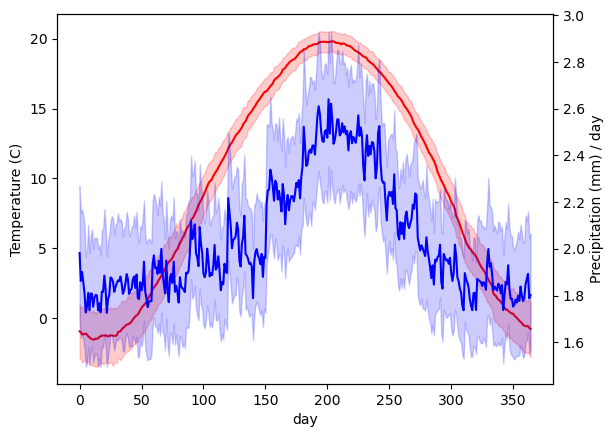

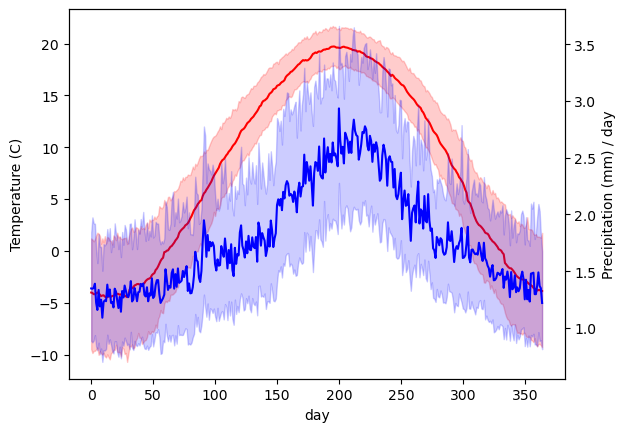

In [29]:
plot_climate_diagramm(region_test_3)
save_plot(plt.gcf(), 'climate_egypt')
plot_climate_diagramm(region_test_3 & (data_index_2['Biome_obs']==17))
save_plot(plt.gcf(), 'climate_egypt_desert')
plot_climate_diagramm(region_test_3 & (data_index_2['Biome_obs']==16))
save_plot(plt.gcf(), 'climate_egypt_aridShrub')
plot_climate_diagramm(region_train_3)
save_plot(plt.gcf(), 'climate_libya')

Here the action starts.

In [ ]:
model_run(region_train_3, region_test_3, objective_list=biome_list_3, feature_plots=False, experiment_name='s3_basic')

And now run a series of tests, collecting data.

In [ ]:

features_median = [feature_name for feature_name in list(data_index_2) if feature_name[-6:]=='Median']
features_weather = [feature_name for feature_name in list(data_index_2) if \
                   re.search('Fall|Summer|Winter|Spring',feature_name)]
seasons = ['Fall','Summer','Winter','Spring']
features_seasons = [[feature_name for feature_name in list(data_index_2) if \
                   re.search(season,feature_name)] for season in seasons]
weather_params = ['pre','tmp|tmin|tmax','tswrf']
features_weather_params = [[feature_name for feature_name in list(data_index_2) if \
                   re.search(weather_param,feature_name)] for weather_param in weather_params]

features_names = ['median']+['weather']+[season for season in seasons]+[weather_param for weather_param in weather_params]
drop_features = [features_median]+[features_weather]+[features_season for features_season in features_seasons]\
                +[features_weather_param for features_weather_param in features_weather_params]

Now run a series of tests, collecting data.

In [ ]:
%%capture
performance = model_run(region_train_3, region_test_3, objective_list=biome_list_3, experiment_name='s3_basic')
simulation_comparisons_3 = pd.DataFrame([['base']+performance], columns=['experiment name','accuracy, train', 'balanced accuracy, train', 'cross val accuracy, train',
            'accuracy, test', 'balanced accuracy, test'])

for i,feature_name in enumerate(features_names):
    display(Markdown('---'))
    print(f'Dropping season {feature_name}')
    print(f'We dropped the features: {drop_features[i]}')
    performance = model_run(region_train_3, region_test_3, objective_list=biome_list_3, \
               drop_columns=drop_features[i], experiment_name=f's3_drop_{feature_name.replace("|","_")}')
    
    simulation_comparisons_3 = pd.concat([simulation_comparisons_3, pd.DataFrame([[f'drop {feature_name}']+performance], columns=list(simulation_comparisons_3))])
    

In [ ]:
simulation_comparisons_3 = simulation_comparisons_3.set_index(['experiment name'])
simulation_comparisons_3.to_pickle('../data/simulation_comparisons_3.pkl')

It performs terribly as would be expected if one removed the most important parameters.

## Section 4: Multiclass classification

Because of the significant negative impact on the learning outcome by choosing regions at very different latitudes we chose as regions
- for training: Russia
- for testing: Canada

In [ ]:
region_train_4 = data_index_2['Pan_2007'] == 'Russia'
region_test_4 = data_index_2['Pan_2007'] == 'Canada'

In [ ]:
# plot the data
data1 = data_index_2.loc[region_train_4] 
data2 = data_index_2.loc[region_test_4]

data = pd.concat([data1,data2])
plot_statistics(data, name_data = 'Section4Canada_Russia')

And now we run the simulation

In [ ]:
model_run(region_train_4, region_test_4, experiment_name = 'basic')

This is relatively bad performance. Fiddling with the hyperparameters changes a lot though the
hyperparameter optimisation is far from optimal. Let's see how good it is.

In [ ]:
model_run(region_train_4, region_test_4, hyperparameter_tuning=True, experiment_name = 'Tuning')

It's not too good in this case. But when we were previously comparing Africa with China fiddling with the parameters actually did improve things. In the following we will thus disable the hyperparameter tuning. Let's try dropping various features and see how that impacts performance.

In [ ]:
%%capture
performance = model_run(region_train_4, region_test_4, experiment_name='s4_basic')
simulation_comparisons_4 = pd.DataFrame([['base']+performance], columns=['experiment name','accuracy, train', 'balanced accuracy, train', 'cross val accuracy, train',
            'accuracy, test', 'balanced accuracy, test'])

for i,feature_name in enumerate(features_names):
    display(Markdown('---'))
    print(f'Dropping season {feature_name}')
    print(f'We dropped the features: {drop_features[i]}')
    performance = model_run(region_train_4, region_test_4, \
               drop_columns=drop_features[i], experiment_name=f's4_drop_{feature_name.replace("|","_")}')
    
    simulation_comparisons_4 = pd.concat([simulation_comparisons_4, pd.DataFrame([[f'drop {feature_name}']+performance], columns=list(simulation_comparisons_4))])

In [ ]:
simulation_comparisons_4 = simulation_comparisons_4.set_index(['experiment name'])
simulation_comparisons_4.to_pickle('../data/simulation_comparisons_4.pkl')

In [ ]:
print(simulation_comparisons_4)

Let's see how things are with biome_Cmax.

In [ ]:
model_run(region_train_4, region_test_4, feature_plots = True, objective='Biome_Cmax', experiment_name = 'Basic_with_Biome_Cmax')

In [ ]:
model_run(region_train_4, region_test_4, hyperparameter_tuning=True, feature_plots = False, objective='Biome_Cmax', experiment_name = 's4Basic_with_Biome_Cmax')

Plot for different features:

In [ ]:
model_run(region_train_4, region_test_4, drop_columns=features_weather, objective='Biome_Cmax', experiment_name='s4_with_Biome_dropWeather')

In [ ]:
model_run(region_train_4, region_test_4, use_columns=features_weather, objective='Biome_Cmax', experiment_name='s4_with_Biome_useWeather')

That is quite decent performance though not as good as with biome_obs.

### Section 4.6

Test the model trained with 'Biome_Cmax' on 'Biome_obs'.

In [ ]:
model_run(region_train_4, region_test_4, objective='Biome_Cmax', objective_test='Biome_obs')

Who would have thought? The model performs as badly as an antigen test measuring temperature. Now test the model trained on 'Biome_obs' on 'Biome_Cmax' (and expect a similar result).

In [ ]:
model_run(region_train_4, region_test_4, objective='Biome_obs', objective_test='Biome_Cmax')

... and the result is just as bad. What a surprise. Now compare our model with LPJ-Guess output

In [ ]:
for objective in ['Biome_obs','Biome_Cmax']:
    print(f'Comparing LPJ-Guess with our model for the parameter {objective}')
    model_run(region_train_4, region_test_4, objective=objective, objective_test=f'LPJ_{objective}')

Who would have thought that our model works badly in this case (duh)?

## Section 5: Regression 

In this part we creatively use the same test and validation set as in part 4. Though we swap order because of performance issues

In [16]:
region_train_5 = data_index_2['Pan_2007'] == 'Canada'
region_test_5 = data_index_2['Pan_2007'] == 'Russia'

In [ ]:
# plot the data
data1 = data_index_2.loc[region_train_5] 
data2 = data_index_2.loc[region_test_5]

data = pd.concat([data1,data2])
plot_statistics(data, name_data = 'Section5Canada_Russia')

And we run the model.

length of training data: 6499
length of testing data: 11696


R^2 Score of RandomForestRegressor on train data: 0.9977
R^2 Score of RandomForestRegressor on test data: 0.8387
MSE for test data 0.006316650772229823
MSE (with sktfct) for test  data 0.006316650772229823
sqrt(MSE) for test data 0.07947736012368442
max error for test data 0.3724700000000002
mean abs error for test data 0.060736882694938446


The figure layout has changed to tight
The figure layout has changed to tight


---
 The feature importance

,importance
tmax_SummerMedian,0.413734
tmin_SummerMean,0.371444
tmp_SummerMedian,0.060980
tmp_FallMedian,0.056406
Pre_SpringMedian,0.016763
...,...
tmin_SpringMean,0.000335
tmin_WinterMedian,0.000333
tmp_SpringMean,0.000312
orgC,0.000310


---

[0.9977084178212365,
 0.8386826907493861,
 0.006316650772229823,
 0.006316650772229823,
 0.07947736012368442,
 0.3724700000000002,
 0.060736882694938446]

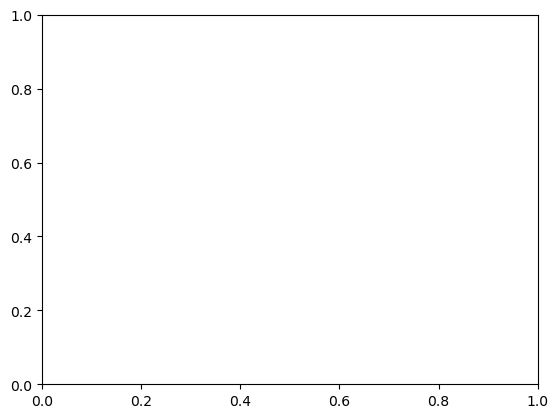

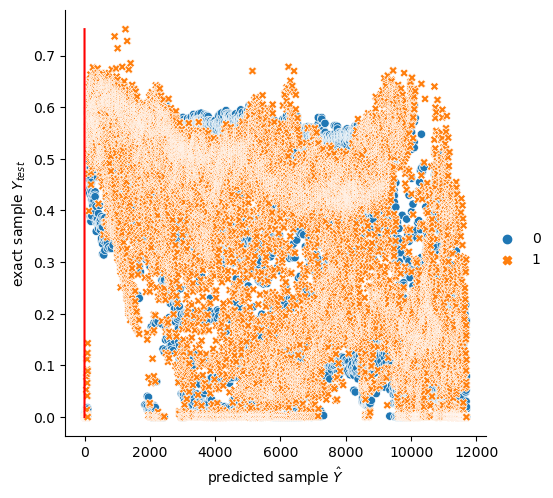

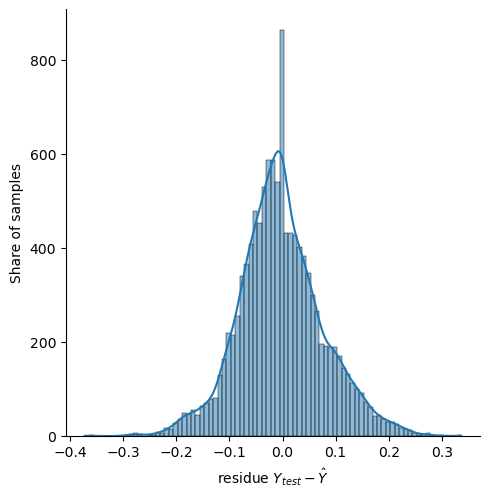

In [18]:
model_run(region_train_5, region_test_5, objective='NPP', continuous_Y=True, feature_plots=False, experiment_name='s5_npp_basic')

A pretty decent outcome. Let's see how it behaves with 'VegC'.

In [ ]:
model_run(region_train_5, region_test_5, objective='VegC', continuous_Y=True, feature_plots=True, experiment_name='s5_vegc_basic')

'VegC' seems to perform worse. In the following we focus on NPP. What happens if we drop the medians?

In [ ]:
%%capture
performance = model_run(region_train_5, region_test_5, experiment_name='s5_basic', continuous_Y=True)
simulation_comparisons_5 = pd.DataFrame([['base']+performance], columns=['experiment name', 'R^2 score, train', 'score, test',
             'MSE, test', 'MSE sktfct, test', 'sqrt(MSE)', 'max err', 'mean abs err'])

for i,feature_name in enumerate(features_names):
    display(Markdown('---'))
    print(f'Dropping season {feature_name}')
    print(f'We dropped the features: {drop_features[i]}')
    performance = model_run(region_train_5, region_test_5, continuous_Y=True, \
               drop_columns=drop_features[i], experiment_name=f's5_npp_drop_{feature_name.replace("|","_")}')
    
    simulation_comparisons_5 = pd.concat([simulation_comparisons_5, pd.DataFrame([[f'drop {feature_name}']+performance], columns=list(simulation_comparisons_5))])

What happens if we only use weather data?

In [ ]:
simulation_comparisons_5 = simulation_comparisons_5.set_index(['experiment name'])
simulation_comparisons_5.to_pickle('../data/simulation_comparisons_5.pkl')

In [ ]:
df_to_latex(simulation_comparisons_5.drop(columns=['R^2 score, train', 'MSE, test', 'MSE sktfct, test']), 's5_experiment_comparison')